# Implementing a Multilayer Artificial Neural Network from Scratch

As you may know, deep learning is getting a lot of attention from the press and is without any doubt the hottest topic in machine learning field. Deep learning can be understood as a set of algorithms that were developed to train artificial neural networks with many layers most efficiently. In this chapter, you will learn the basic concepts of artificial neural networks so that you will be well-equipped for the following chapters, which will introduce advanced Python-based deep learning libraries and **Deep Neural Networks (DNN)** architectures that are particularly well-suited for image and text-analyses.

The topics that we will cover in this chapter are as follows:

* Getting a conceptual understanding of multilayer neural networks
* Implementing the fundamental backpropagation algorithm for neural network training from scratch
* Training a basic multilayer neural network for image classfication

# Modeling complex functions with artificial neural networks

At the beginning of this book, we started our journey through machine learning algorithms with artificial neurons. Artificial neurons represent the building blocks of the multilayer artificial neural networks that we will discuss in this chapter. The basic concept behind artificial neural networks was built upon hypothesis and models of how the human brain works to solve complex problem tasks. Although artificial neural networks have gained a lot of popularity in recent years, early studies of neural networks go back to the 1940s when Warren McCulloch and Walter Pitt first described how neurons could work. 

However, in the decades that followed the first implementation of the **McCulloch-Pitt neuron** model - Rosenblatt's perceptron in the 1950s, many researchers and machine learning practitioners slowly began to lose interest in neural networks since no one had a good solution for training a neural network with multiple layers. Eventually, interest in neural networks was rekindled in 1986 when D.E. Rumelhart, G.E. Hinton, and R.J. Williams were involved in the (red)discovery and popularization of the backpropagation algorithm to train neural networks more efficiently, which we will discuss in more detail later in this chapter. Readers who are interested in the history of **Artificial Intelligence (AI)**, machine learning, and neural networks are also encouraged to read the Wikipedia article on *AI winter*, which are periods of time where a large portion of the research community lost interest in the study of neural networks. 

However, neural networks have never been as popular as they are today, thanks to the many major breakthroughs that have been made in the previous decade, which resulted in what we now call deep learning algorithms and architectures - neural networks that are composed of many layers. Neural networks are a hot topic not only in academic research but also in big technology companies such as Facebook, Microsoft, and Google, who invest heavily in artificial neural networks and deep learning research. As of today, complex neural networks powered by deep learning algorithms are considered state of the art when it comes to complex problem solving such as image and voice recognition. Popular examples of the products in our everyday life that are powered by deep learning are Google's image search and Google Translate - an application for smartphones than can automatically recognize text in images for real-time translation into more than 20 languages. 

Many exciting applications of DNNs have been developed at major tech companies and the pharmaceutical industry as listed in the following, non-comprehensive list of examples: 

* Facebook's DeepFace for tagging images
* Baidu's DeepSpeech, which is able to handle voice queries in Mandarin
* Google's new language translation service
* Novel techniques for drug discovery and toxicity prediction
* A mobile application that can detect skin cancer with an accuracy similar to professionally trained dermatologists

## Single-layer neural network recap

This chapter is all about multilayer neural networks, how they work, and how to train them to solve complex problems. However, before we dig deeper into a particular multilayer neural network architecture, let's briefly reiterate some of the concepts of single-layer neural networks that we introduced in the beginning of this book, namely, the **ADAptive LInear NEuron (Adaline)** algorithm, which is shown is the following figure:

<img src='images/12_01.png'>

Previously, we implemented the Adaline algorithm to perform binary classification, and we used the gradient descent optimization algorithm to learn the weight coefficients of the model. In every epoch (pass over the training set), we updated the weight vector $w$ using the following update rule: 

$$w := w + \Delta w, \text{where} \Delta w = \eta J(w)$$

In other words, we computed the gradient based on the whole training set and updated the weights of the model by taking a step into the opposite direction of the gradient $J(w)$. In order to find the optimal weights of the model, we optimized an objective function that we defined as the **Sum of Squared Errors (SSE)** cost function $J(w)$. Furthermore, we multiplied the gradient by a factor, the learning rate $\eta$, which we had to choose carefully to balance the speed of learning against the risk of overshooting the global minimum of the cost function. 

In gradient descent optimization, we updated all weights simultaneously after each epoch, and we defined the partial derivative for each weight $w_j$ in the weight vector $w$ as follows:

$$\frac{\partial}{\partial w_j}J(w) = -\sum_i{y^{(i)} - a^{(i)}}x^{(i)}_j$$

Here, $y^{(i)}$ is the target class label of a particular sample $x^{(i)}$, and $a^{(i)}$ is the activation of the neuron, which is a linear function in the special case of Adaline. Furthermore, we defined the activation function $\phi$ as follows:

$$\phi(z) = z = a$$

Here, the net input $z$ is a linear combination of the weights that are connecting the input to the output layer:

$$z = \sum_j w_jx_j = w^Tx$$

While we used the activation $\phi(z)$ to compute the gradient update, we implemented a threshold function to squash the continuous valued output into binary class labels for prediction:

$$ŷ = 1 \, \text{if} \, g(z) \ge 0; -1 \, \text{otherwise}$$

Note that although Adaline consists of two layers, one input layer and one output layer, it is called single-layer network because of its single link between the input and output layers. 

Also, we learned about a certain trick to accelerate the model training, the so-called **stochastic gradient descent** optimization. Stochastic gradient descent approximates the cost from a single training sample (online learning) or a small subset of training samples (mini-batch learning). We will make use of this concept later in this chapter when we implement and train a multilayer perceptron. Apart from faster learning - due to the more frequent weight updates compared to gradient descent - its noisy nature is also regarded as beneficial when training multilayer neural networks with non-linear activation functions, which do not have a convex cost function. Here, the added noise can help to escape local cost minima, but we will discuss this topic in more detail later in this chapter.

## Introducing the multilayer neural network architecture

In this section, you will learn how to connect multiple single neurons to a multilayer feedforward neural network; this special type of *fully connected* network is also called **Multilayer Perceptron (MLP)**. The following picture illustrates the concept of an MLP consisting of three layers:

<img src='images/12_02.png'>

The MLP depicted in the preceding figure has one input layer, one hidden layer, and one output layer. The units in the hidden layear are fully connected to the input layer. If such a network has more than one hidden layer, we also call it a **deep artificial neural network**. 

We can add an arbitrary number of hidden layers to the MLP to create deeper network architectures. Practically, we can think of the number of layers and units in a neural network as additional hyperparameters that we want to optimize for a given problem task using cross-validation techniques. 

However, the error gradients that we will calculate later via backpropagation will become increasingly small as more layers are added to a network. This vanishing gradient problem makes the model learning more challenging. Therefore, special algorithms have been developed to help train such deep neural network structures; this is known as **deep learning**. 

As shown in the preceding figure, we denote the *i*th activation unit in the *l*th layer as $a_i^{(l)}$. To make the math and code implementations a bit more intuitive, we will not use numerical indices to refer to layers, but we will use the *in* superscript for the input layer, the *h* superscript for the hidden layer, and the *out* superscript for the output layer. For instance, $a_i^{(in)}$ refers to the *i*th value in the input layer, $a_i^{(h)}$ refers to the *i*th unit in the hidden layer, adn $a_i^{(out)}$ refers to the *i*th unit in the output layer. Here, the activation unit $a_0^{(in)}$ and $a_0^{(h)}$ are the **bias units**, which we set equal to 1. The activation of the units in the input layer is just its input plus the unit bias. 

Later in this chapter, we will implement the multilayer perceptron using separate vectors for the bias unit, which makes the code implementation more efficient and easier to read. This concept is also used by TensorFlow, a deep learning library that we will introduce later. However, the mathematical equations that will follow, would appear more complex or convoluted if we had to work with additional variables for the bias. However, note that the computation via appending 1s to the input vector (as shown previously) and using a weight variable as bias is exactly the same as operating with separate bias vectors; it is merely a different convention. 

Each unit in layer *l* is connected to all units in layer $l+1$ vi a weight coefficient. For example, the connection between the $k$th unit in the layer $l$ to the $j$th unit in layer $l+1$ will be written as $w_{k,j}^{l}$. Referring back to the previous figure, we denote the weight matrix that connects the input to the hidden layer as $W^{(h)}$, and write the matrix that connects the hidden layer to the output layer as $W^{(out)}$. 

While one unit in the output layer would suffice for a binary classification task, we saw a more general form of neural network in the preceding figure, which allows us to perform multiclass classification via a generalization of the **One-versus-all (OvA)** technique. To better understand how this works, remember the one-hot representation of categorical variables. For example, we can encode the three class labels in the familiar Iris dataset (0=setosa, 1=versicolor, 2=virginica) as follows:

$$0 = [1, 0, 0], 1 = [0, 1, 0], 2 = [0, 0, 1]$$

This one-hot vector representation allows us to tackle classification tasks with an arbitrary number of unique class labels present in the training set. 

If you are new to neural network representations, the indexing notation (subscripts and superscripts) may look a little bit confusing at first. What may seem overly complicated at first will make much more sense in later section when we vectorize the neural network representation. As introduced earlier, we summarize the weights that connect the input and hidden layers by a matrix $w^{(h)} \in \mathbb{R}^{m \times d}$, where $d$ is te number of hidden units and $m$ is the number of input units including the bias unit. Since it is important to internalize this notation to follow the concepts later in this chapter, let's summarize what we have just learned in a descriptive illustration of a simplified 3-4-3 multilayer perceptron: 

<img src='images/12_03.png'>

## Activating a neural network via forward propagation

In this section, we will describe the process of **forward propagation** to calculate the output of an MLP model. To understand how it fits into the context of learning an MLP model, let's summarize the MLP learning procedure in three simple steps: 

1. Starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output. 
2. Based on the network's output, we calculate the error that we want to minimize using a cost function that we will describe later. 
3. We backpropagate the error, find its derivative with respect to each weight in the network, and update the model.

Finally, after we repeat these three steps for multiple epochs and learn the weights of the MLP, we use forward backpropagation to calculate the network output and apply a threshold function to obtain the predicted class labels in the one-hot representation, which we described in the previous section.

Now, let's walk through the individual steps of forward propagation to generate an output from the patters in the training data. Since each unit in the hidden layer is connected to all units in the input layers, we first calculate the activation unit of the hidden layer $a_l^{(h)}$ as follows:

$$z_1^{(h)} = a_0^{(in)}w_{0,1}^{(h)} + a_1^{(in)}w_{1,1}^{(h)} + \ldots + a_m^{(in)}w_{m,1}^{(h)}$$

$$a_1^{(h)} = \phi(z_1^{(h)})$$

Here, $z_1^{(h)}$ is the net input and $\phi$ is the activation function, which has to be differentiable to learn the weights that connect the neurons using a gradient-based approach. To be able to solve complex problem such as image classification, we need non-linear activation functions in our MLP model, for example, the sigmoid (logistic) activation function that we remember from the section about logistic regression:

$$\phi(z) = \frac{1}{1 + e^{-z}}$$

As we can remember, the sigmoid function is an S-shaped curve that maps the net input $z$ onto a logistic distribution in the range 0 to 1, which cuts the $y$-axis at $z=0$, as shown in the following graph: 

<img src='images/12_04.png'>

MLP is a typical example of a feedforward artificial neural network. The term **feedforward** refers to the fact that each layer serves as the input to the next layer without loops, in contrast to recurrent neural network - an architecture that we will discuss later in this chapter and discuss in more detail in the last chapter of this book. The term *multilayer perceptron* may sound a little bit confusing since the artificial neurons in this network architecture are typically sigmoid units, not perceptrons. Intuitively, we can think of the neurons in the MLP as logistic regression units that return values in the continuous range between 0 and 1. 

For purposes of code efficiency and readability, we will now write the activation in a more compact form using the concepts of basic linear algebra, which will allow us to vectorize our code implementation via NumPy rather than writing multiple nested and computationally expensive Python *for* loops: 

$$z^{(h)} = a^{(in)}W^{(h)}$$

$$a^{(h)} = \phi(z^{(h)})$$

Here, $a^{(in)}$ is our $l \times m$ dimensional feature vector of a sample $x^{(in)}$ plus a bias unit. $W^{(h)}$ is an $m \times d$ dimensional weight matrix where $d$ is the number of units in the hidden layer. After matrix-vector multiplication, we obtain the $l \times d$ dimensional net input $z^{(h)}$ to calculate the activation $a^{(h)}$ (where $a^{(h)} \in \mathbb{R}^{l \times d}$). Furthermore, we can generalize this computation to all $n$ samples in the training set: 

$$Z^{(h)} = A^{(in)}W^{(h)}$$

Here, $ A^{(in)}$ is not an $n \times m$ matrix, and the matrix-matrix multiplication will result in an $n \times d$ dimensional net input matrix $Z^{(h)}$. Finally, we apply the activation function $\phi$ to each value in the net input matrix to get the $n \times d$ activation matrix $A^{(h)}$ for the next layer (here, the output layer):

$$a^{(h)} = \phi(z^{(h)})$$

Similarly, we can write the activation of the output layer in vectorized form for multiple samples: 

$$Z^{(out)} = A^{(h)}W^{(out)}$$

Here, we multiply the $d \times t$ matrix $W^{(out)}$ ($t$ is the number of output units) by the $n \times d$ dimensional matrix $A^{(h)}$ to obtain the $n \times t$ dimensional matrix $Z^{(out)}$ (the columns in this matrix represent the output for each sample). 

Lastly, we apply the sigmoid activation function to obtain the continuous valued output of our network:

$$a^{(out)} = \phi(z^{(out)})$$

## Classifying handwritten digits

In the previous section, we covered a lot of the theory around neural networks, which can be a little bit overwhelming if you are new to this topic. Before we continue with the discussion of the algorithm for learning the weights of the MLP model, backpropagation, let's take a short break from the theory and see a neural network in action. 

In this section, we will implement and train our first multilayer neural network to classify handwritten digits from the popular **Mixed National Institute of Standards and Technology (MNIST)** dataset that has been constructed by Yann LeCun and others, and servers as a popular benchmark dataset for machine learning algorithms. 

### Obtaining the MNIST dataset 

The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts: 

* Training set images: *train-images-idx3-ubyte.gz* (60,000 samples)
* Training set labels: *train-labels-idx1-ubyte.gz* (60,000 labels)
* Test set images: *t10k-images-idx3-ubyte.gz* (10,000 samples)
* Test set labels: *t10k-labels-idx1-ubyte.gz* (10,000 labels)

The MNIST dataset was constructed from two datasets from the US **National Institute of Standards and Technology (NIST)**. The training dataset consists of handwritten digits from 250 different people, 50 percent high school students, and 50 percent employees from the Census Bureau. Note that the test set contains handwritten digits from different people following the same split. 

The images are stored in byte format, and we will read them into NumPy arrays that we will use to train and test our MLP implementation. In order to do that, we will define the following helper function:

In [1]:
import os 
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
    
    return images, labels

The *load_mnist* function returns two arrays, the first being an $n \times m$ dimensional NumPy array (*images*), where $n$ is the number of samples and $m$ is the number of features (here, pixels). The training dataset consists of 60,000 training digits and the test set contains 10,000 samples, respectively. The images in the MNIST dataset consist of 28 x 28 pixels, and each pixel is represented by a gray scale intensity value. Here, we unroll the 28 x 28 pixels into one-dimensional row vectors, which represent the rows in our *images* array (784 per row or image). The second array (*labels*) returned by the *load_mnist* function contains the corresponding target variable, the class labels (integers 0-9) of the handwritten digits. 

We normalized the pixels values in the MNIST to the range -1 to 1 (originally 0 to 255). The reason behind this is that gradient-based optimization is much more stable under these conditions. Note that we scaled the images on a pixel-by-pixel basis, which is different from the feature scaling approach that we took in previous chapters. Previously, we derived scaling paramters from the training set and used these to scale each column in the training set and test set. However, when working with image pixels, centering them at zero and rescaling them to a [-1, 1] range is also common and usually works in practice. 

Another recently developed trick to improve convergence in gradient-based optimization through input scaling is batch normalization, which is an advanced topic that we will not cover in this book. 

By executing the following code, we will now load the 60,000 training instances as well as the 10,000 test samples from the local directories where we unzipped the MNIST dataset (in the following code snippet, it is assumed that the downloaded MNIST files were unzipped to the same directory in which this code was executed): 

In [2]:
X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


To get an idea of how those images in MNIST look, let's visualize examples of the digits 0-9 after reshaping the 784-pixel vectors from our feature matrix into the original 28 x 28 image that we can plot via Matplotlib's *imshow* function:

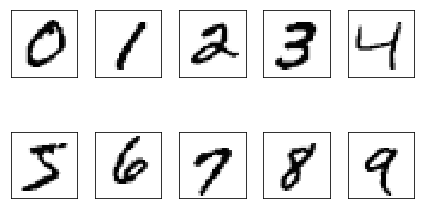

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(10):
    img = X_train[y_train==i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

We should now see a plot of the 2 x 5 subfigures showing a representative image of each unique digit. 

In addition, let's also plot multiple examples of the same digit to see how different the handwritting really is:

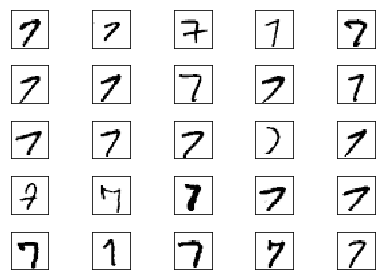

In [4]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(25):
    img = X_train[y_train==7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

After executing the code, we should now see the first 25 variantes of the digit 7. 

After we have gone through all the previous steps, it is a good idea to save the scaled images in a format that we can load more quickly into a new Python session to avoid the overhead of reading in and processing the data again. When we are working with NumPy arrays, an efficient yet most convenient method to save multidimensional arrays to disk is NumPy's *savez* function. 

In short, the *savez* function is analogous to Python's *pickle* module that we used before, but optimized for storing NumPy arrays. The *savez* function produces zipped archives of our data, producing *.npz* files that contain files in the *.npz* format. Further, instead of using *savez*, we will use *savez_compressed*, which uses the same syntax as *savez*, but further compresses the output file down to substantially smaller file sizes. The following code snippet will save both the training and test datasets to the archive file *'mnist_scaled.npz'*:

In [5]:
import numpy as np

np.savez_compressed('mnist_scaled.npz', 
                    X_train=X_train, 
                    y_train=y_train, 
                    X_test=X_test, 
                    y_test=y_test)

After we created the *.npz* files, we can load the preprocessed MNIST images arrays using NumPy's *load* function as follows:

In [6]:
mnist = np.load('mnist_scaled.npz')

The *mnist* variable now references to an object that can access the four data arrays as we provided them keywork arguments to the *savez_compressed* function, which are listed under the files attribute list of the *mnist* object:

In [7]:
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

For instance, to load the training data into our current Python session, we will access the *'X_train'* array as follows (similar to a Python dictionary):

In [8]:
X_train = mnist['X_train']

Using a list comprehension, we can retrieve all four data arrays as follows:

In [9]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

Note that while the preceding *np.savez_compressed* and *np.load* examples are not essential for executing the code at this chapter, it serves as a demonstration of how to save and load NumPy arrays conveniently and efficiently. 

## Implementing a multilayer perceptron

In subsection, we will now implement the code of an MLP with one input, one hidden, and one output layers to classify the images in the MNIST dataset. I have tried to keep the code as simple as possible. However, it may seem a little bit complicated at first.

The code will contain parts that we have not talked about yet, such as the backpropagation algorithm, but most of the code should look familiar to you based on the Adaline implementation, and the discussion of forward propagation in earlier sections. 

DO not worry if not all the code makes immediate sense to you; we will follow up on certain parts later in this chapter. However, going over the code at this stage can make it easier to follow the theory later. 

The following is the implementation of a multilayer perceptron:

In [15]:
import numpy as np
import sys

class NeuralNetMLP(object):
    """Feedforward neural network / Multi-layer perceptron classifier
    
    Parameters
    ---------------
    n_hidden : int (default: 30)
        Number of hidden units
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set
    eta : float (default: 0.001)
        Learning rate
    shuffle : bool (default: True)
        Shuffles training data every epoch
        if True to prevent cycles
    minibatch_size : int (default: 1)
        Number of training samples per minibatch
    seed : int (default: None)
        Random seed for initializing weights and shuffling
        
    Attributes
    ---------------
    eval_ : dict
        Dictionary collecting the cost, training accuracy, 
        and validation accuracy for each epoch during training
    """
    def __init__(self, n_hidden=30, l2=0., epochs=100, 
                 eta=0.001, shuffle=True, minibatch_size=1, 
                 seed=None):
        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size
        
    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation
        
        Parameters
        ---------------
        y : array, shape = [n_samples]
            Target values
            
        Returns
        ---------------
        onehot : array = shape = (n_samples, n_labels)        
        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T
    
    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def _forward(self, X):
        """Compute forward propagation step"""
        
        # step 1: net input of hidden layer
        # [n_samples, n_features] dot [n_features, n_hidden]
        # -> [n_samples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h
        
        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)
        
        # step 3: net input of output layer
        # [n_samples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_samples, n_classlabels]
        z_out = np.dot(a_h, self.w_out) + self.b_out
        
        # step 4: activation output layer
        a_out = self._sigmoid(z_out)
        
        return z_h, a_h, z_out, a_out
    
    def _compute_cost(self, y_enc, output):
        """Compute cost function
        
        Parameters
        ---------------
        y_enc : array, shape = (n_samples, n_labels)
            one-hot encoded class labels
        output : array, shape = [n_samples, n_output_units]
            Activation of the output layer (forward propagation)
        
        Returns 
        ---------------
        cost : float
            Regularized cost
        """
        L2_term = (self.l2 * (np.sum(self.w_h ** 2.) + np.sum(self.w_out ** 2.)))
        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        return cost
    
    def predict(self, X):
        """Predict class labels
        
        Parameters
        ---------------
        X : array, shape = [n_samples, n_features]
            Input layer with original features
        
        Returns 
        ---------------
        y_pred : array, shape = [n_samples]
            Predicted class labels
        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred
    
    def fit(self, X_train, y_train, X_valid, y_valid):
        """Learn weights from training data
        
        Parameters
        ---------------
        X_train : array, shape = [n_samples, n_features]
            Input layer with original features
        y_train : array, shape = [n_samples]
            Target class labels
        X_valid : array, shape = [n_samples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_samples]
            Simple labels for validation during training
            
        Returns
        ---------------
        self
        """
        # no. of class labels
        n_output = np.unique(y_train).shape[0]
        n_features = X_train.shape[1]
        
        # Weight initialization
        
        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = np.random.normal(loc=0.0, scale=0.1, 
                                    size=(n_features, 
                                          self.n_hidden))
        
        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1, 
                                        size=(self.n_hidden, 
                                              n_output))

        # for progr. format.
        epoch_strlen = len(str(self.epochs))
        self.eval_ = {'cost': [], 
                      'train_acc': [], 
                      'valid_acc': []}
        
        y_train_enc = self._onehot(y_train, n_output)
        
        # iterate over training epochs
        for i in range(self.epochs):
            # iterate over minibatches
            indices = np.arange(X_train.shape[0])
            
            if self.shuffle:
                self.random.shuffle(indices)
                
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                
                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])
                
                # Backpropagation
                
                # [n_samples, n_classlabels]
                sigma_out = a_out - y_train_enc[batch_idx]
                
                # [n_samples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)
                
                # [n_samples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_samples, n_hidden]
                sigma_h = (np.dot(sigma_out, self.w_out.T) * sigmoid_derivative_h)
                
                # [n_features, n_samples] dot [n_samples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
                grad_b_h = np.sum(sigma_h, axis=0)
                
                # [n_hidden, n_samples] dot [n_samples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, sigma_out)
                grad_b_out = np.sum(sigma_out, axis=0)
                
                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h
                
                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out
            
            # Evaluation
            
            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc, 
                                      output=a_out)
            
            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)
            
            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) / X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) / X_valid.shape[0])
            
            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             ' | Train/Valid Acc.: %.2f%%/%.2f%% '
                             % (epoch_strlen, i+1, self.epochs, 
                                cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
            
            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)
        
        return self

Once you are done with executing this code, let's now initialize a new 784-100-10 MLP - a neural network with 784 input units (*n_features*), 100 hidden units (*n_hidden*), and 10 output units (*n_output*): 

In [16]:
nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=200, 
                  eta=0.0005, 
                  minibatch_size=100, 
                  shuffle=True, 
                  seed=1)

If you read through the *NeuralNetMLP* code, you have probably already guessed what these parameters are for. Here, you find a short summary of these:

* *l2*: This is the $\lambda$ parameter for L2 regularization to decrease the degree of overfitting.
* *epochs*: This is the number of passes over the training set.
* *eta*: This is the learning rate $\eta$.
* *shuffle*: This is for shuffling the training set prior to every epoch to prevent that the algorithm gets stuck in circles.
* *seed*: This is a random seed for shuffling and weigh initialization. 
* *minibatch_size*: This is the number of training samples in each mini-batch when splitting of the training data in each epoch for stochastic gradient descent. The gradient descent is computed for each mini-batch separately instead of the entire training data for faster learning.

Next, we train the MLP using 55,000 samples from the already shuffled MNIST training dataset and used the remaining 5,000 samples for validation during training. Note that training the neural network may take up to 5 minutes on standard desktop computer hardware. 

As you may have noticed from the preceding code implementation, we implemented the *fit* method so that it takes four input arguments: training images, training labels, validation images, and validation labels. In neural network training, it is really useful to already compare training and validation accuracy during training, which helps us judge whether the network model performs well, given the architecture and hyperparameters. 

In general, training (deep) neural networks is relatively expensive compared with the other models we discussed so far. Thus, we want to stop it early in certain circumstances and start over with different hyperparameter setting. Alternatively, if we find that it increasingly tends to overfit the training data (noticeable by an increasing gap between training and validation set performance), we may want to stop the training early as well. 

Now, to start the training, we execute the following code:

In [17]:
nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], 
       X_valid=X_train[55000:], y_valid=y_train[55000:])

200/200 | Cost: 5047.08  | Train/Valid Acc.: 99.29%/97.94%  

In our *NeuralNetMLP* implementation, we also defined an *eval_* attribute that collects the cost, training, and validation accuracy for each epoch so that we can visualize the results using Matplotlib:

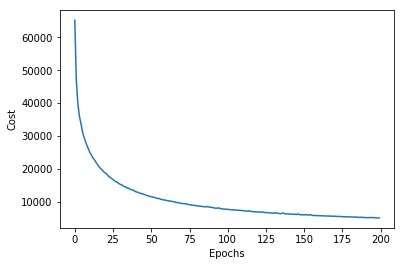

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

As we can see, the cost decreased substantially during the first 100 epochs and seems to slowly converge in the last 100 epochs. However, the small slope between epoch 175 and epoch 200 indicates that the cost would further decrease with a training over additional epochs. 

Next, let's take a look at the training and validation accuracy: 

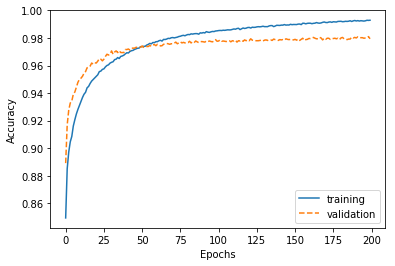

In [19]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], 
         label='training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], 
         label='validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

The plot reveals that the gap between training and validation accuracy increases the more epochs we train the network. At approximately the 50th epoch, the training and validation accuracy values are equal, and then, the network starts overfitting the training data. 

Note that this example was chosen deliberately to illustrate the effect of overfitting and demonstrate why it is useful to compare the validation and training accuracy values during training. One way to decrease the effect of overfitting is to increase the regularization strength - for example, by setting *l2=0.1*. Another useful technique to tackle overfitting in neural networks, dropout, will be covered later. 

Finally, let's evaluate the generalization performance of the model by calculating the prediction accuracy on the test set:

In [20]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 97.53%


Despite the slight overfitting on the training data, our relatively simple one-hidden layer neural network achieved a relatively good performance on the test dataset, similar to the validation set accuracy (97.98 percent). 

To further fine-tune the model, we could change the number of hidden units, values of the regularization parameters, and the learning rate or use various other tricks that have been developed over the years but are beyond the scope of this book. In a next chapter, you will learn about a different neural network architecture that is known for its good performance on image datasets. Also, the chapter will introduce additional performance-enhancing tricks such as adaptive learning rates, momentum learning, and dropout. 

Lastly, let's take a look at some of the images that our MLP struggles with:

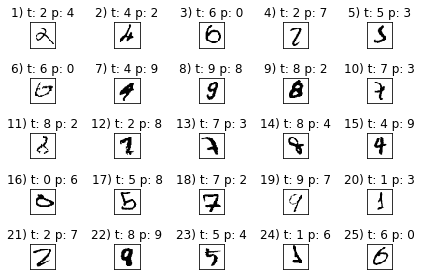

In [23]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d'
                    % (i+1, correct_lab[i], miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

We should now see a 5 x 5 subplot matrix where the first number of subtitles indicates the plot index, the second number represents the true class label (*t*), and the third number stands for the predicted class label (*p*). 

As we can see in the preceding figure, some of those images are even challenging for us humans to classify correctly. For example, the 6 in subplot 8 really looks like a carelessly drawn 0, and the 8 in subplot 23 could be a 9 due to the narrow lower part combined with the bold line. 

## Training an artificial neural network

Now that we have seen a neural network in action and have gained a basic understanding of how it works by looking over the code, let's dig a little bit deeper into some of the concepts, such as the logistic cost function and the backpropagation algorithm that we implemented to learn the weights. 

### Computing the logistic cost function

The logistic cost function that we implemented as the *_compute_cost* method is actually pretty simple to follow since it is the same cost function that we described in the logistic regression previously.

$$J(w) = -\sum_{i=1}^n y^{[i]}\log(a^{[i]}) + (1 - y^{[i]})\log(1-a^{[i]})$$

Here, $a^{[i]}$ is the sigmoid activation of the $i$th sample in the dataset, which we compute in the forward propagation step:

$$a^{[i]} = \phi(z^{[i]})$$

Again, note that in this context, the superscript *[i]* is an index for training samples, not layers.

Now, let's add a regularization term, which allows us to reduce the degree of overfitting. As you recall from earlier chapters, the L2 regularization term is defined as follows (remember that we do not regularize the bias units):

$$L2 = \lambda||w||_2^2 = \lambda\sum_{j=1}^m w_j^2$$

By adding the L2 regularization term to our logistic cost function, we obtain the following equation:

$$J(w) = \left[-\sum_{i=1}^n y^{[i]}\log(a^{[i]}) + (1 - y^{[i]})\log(1-a^{[i]})\right] + \lambda||w||_2^2$$

Since we implemented an MLP for multiclass classification that returns an output vector of $t$ elements that we need to compare to the $t \times l$ dimensional target vector in the one-hot encoding representation, for, example, the activation of the third layer and the target class (here, class 2) for a particular sample may look like this:

$$
a^{out} = 
\begin{bmatrix}
0.1 \\
0.9 \\
\vdots \\
0.3
\end{bmatrix}, 
y = 
\begin{bmatrix}
0 \\
1 \\
\vdots \\
0
\end{bmatrix}
$$

Thus, we need to generalize the logistic cost function to all $t$ activation units in our network. Thus, the cost function (without the regularization term) becomes the following: 

$$J(w) = -\sum_{i=1}^n\sum_{j=1}^t y_j^{[i]}\log(a_j^{[i]}) + (1 - y_j^{[i]})\log(1-a_j^{[i]})$$

Here, again, the superscript $[i]$ is the index of a particular sample in our training set.

The following generalized regularization term may look a little bit complicated at first, but we are just calculating the sum of all weights in an $l$ layer (without the bias term) that we added to the first column:

$$J(w) = -\left[\sum_{i=1}^n\sum_{j=1}^t y_j^{[i]}\log(a_j^{[i]}) + (1 - y_j^{[i]})\log(1-a_j^{[i]})\right] + \frac{\lambda}{2}\sum_{l=1}^{L-1}\sum_{i=1}^{u_l}\sum_{j=1}^{u_{l+1}}(w_{j,i}^{(t)})^2$$

Here, $u_l$ refers to the number of units of a given layer l, and the following expression represents the penalty term:

$$\frac{\lambda}{2}\sum_{l=1}^{L-1}\sum_{i=1}^{u_l}\sum_{j=1}^{u_{l+1}}(w_{j,i}^{(t)})^2$$

Remember that our goal is to minimize the cost function $J(W)$; thus we need to calculate the partial derivative of the parameters $W$ with respect to each weight for every layer in the network:

$$\frac{\partial}{\partial w_{j,i}^{(l)}} J(W)$$

In the next section, we will talk about the backpropagation algorithm, which allows us to calculate those partial derivatives to minimize the cost function.

Note that $W$ consists of multiple matrices. In a multilayer perceptron with one hidden unit, we have the weight matrix $W^{(h)}$, which connects the input to the hidden layer, and $W^{out}$, which connects the hidden layer to the output layer. An intuitive visualization of the three-dimensional tensor $W$ is provided in the following figure:

<img src='images/12_10.png'>

In this simplified figure, it may seem that both $W^{(h)}$ and $Ẁ^{(out)}$ have the same number of rows and columns, which is typically not the case unless we initialize an MLP with the same number of hidden layers, output units, and input features. If this sounds confusing, stay tuned for the next section, where we will discuss the dimensionality of $W^{(h)}$ and $W^{(out)}$ in more detail in the context of the backpropagation algorithm. Also, I want to encourage you to read through the code of the *NeuralNetMLP* again, which I annotated with helpful comments about the dimensionality with regard to the different matrices and vector transformations.

### Developing your intuition for backpropagation

Although backpropagation was rediscovered and popularized more than 30 years ago, it still remains one of the most widely used algorithms to train artificial neural networks very efficiently. 

In this section, I intend to provide a short and intuitive summary and the bigger picture of how this fascinating algorithm works before we dive into more mathematical details. In essence, we can think of backpropagation as a very computationally efficient approach to compute the partial derivatives of a complex cost function in multilayer neural networks. Here, our goal is to use those derivatives to learn the weight coefficients for parametrizing such a multilayer artificial neural network. The challenge in the parametrization of neural networks is that we are typically dealing with a very large number of weight coefficients in a high-dimensional feature space. In contrast to cost functions of single-layer neural networks such as Adaline or logistic regression, which we have seen in previous chapter, the error surface of a neural network cost function is not convex or smooth with respect to the parameters. There are many bumps in this high-dimensional cost surface (local minima) that we have to overcome in order to find the global minimum of the cost function. 

You may recall the concept of the chain rule from your introductory calculus. The chain rule is an approach to compute the derivative of a complex, nested, function, such as $f(g(x))$. In the context of computer algebra, a set of techniques has been developed to solve such problems very efficiently, which is also known as **automatic differentiation**. 

Automatic differentiation comes with two modes, the forward and reverse modes; backpropagation is simply just a special case of reverse mode automatic differentiation. The key point is that applying the chain rule in the forward mode can be quite expensive since we would have to multiply large matrices for each layer (Jacobians) that we eventually multiply by a vector to obtain the output. The trick of reverse mode is that we start from right to left: we multiply a matrix by a vector, which yields another vector that is multiplied by the next matrix and so on. Matrix-vector multiplication is computationally much cheaper than matrix-matrix multiplication, which is why backpropagation is one of the most popular algorithms used in neural network training. 

### Training neural networks via backpropagation

In this section, we will go through the math of backpropagation to understand how you can learn the weights in a neural network very efficiently. Depending on how comfortable you are with mathematical representations, the following equations may seem relatively complicated at first. 

In a previous section, we saw how to calculate the cost as the difference between the activation of the last layer and the target class label. Now, we will see how the backpropagation algorithm works to update the weights in our MLP model from a mathematical perspective, which we implemented in the *# Backpropagation* section inside the *fit* method. As we recall from the beginning of this chapter, we first need to apply forward propagation in order to obtain the activation of the output layer, which we formulated as follows:

$$Z^{(h)} = A^{(in)}W^{(h)} \quad \text{net input of the hidden layer}$$

$$A^{(h)} = \phi(Z^{(h)}) \quad \text{activation of the hidden layer}$$

$$Z^{(out)} = A^{(h)}W^{(out)} \quad \text{net input of the output layer}$$

$$A^{(out)} = \phi(Z^{(out)}) \quad \text{activation of the output layer}$$

Concisely, we just forward-propagate the input features through the connection in the network, as shown in the following illustration:

<img src='images/12_11.png'>

In backpropagation, we propagate the error from right to left. We start by calculating the error vector of the output layer:

$$\delta^{(out)} = a^{(out)} - y$$

Here, $y$ is the vector of the true class labels (the corresponding variable in the *NeuralNetMLP* code is $sigma_out$).

Next, we calculate the error term of the hidden layer:

$$\delta^{(h)} = \delta^{(out)}(W^{(out)})^T \odot \frac{\partial \phi(z^{(h)})}{\partial z^{(h)}}$$

Here, $\frac{\partial \phi(z^{(h)})}{\partial z^{(h)}}$ is simply the derivative of the sigmoid activation function, which we computed as *sigmoid_derivative_h = a_h (1. - a_h)* in the *fit* method of the *NeuralNetMLP*:

$$\frac{\partial \phi(z^{(h)})}{\partial z^{(h)}} = (a^{(h)} \odot (1 - a^{(h)}))$$

Note that the $\odot$ symbol means element-wise multiplication in this context.

Next, we compute the $\delta^{(h)}$ layer error matrix (*sigma_h*) as follows:

$$\delta^{(h)} = \delta^{(out)} (W^{(out)})^T \odot (a^{(h)} \odot (1 - a^{(h)}))$$

To better understand how we computed this $\delta^{(h)}$ term, let's walk through it in more detail. In the preceding equation, we used the transpose $(W^{(out)})^T$ of the $h \times t$-dimensional matrix $W^{(out)}$. Here, $t$ is the number of output class labels and $h$ is the number of hidden units. The matrix multiplication between the $n \times t$-dimensional $\delta^{(out)}$ matrix and the $t \times h$-dimensional matrix $(W^{(out)})^T$, results in an $n \times t$-dimensional matrix that we multiplied elementwise by the sigmoid derivative of the same dimension to obtain the $n \times t$-dimensional matrix $\delta^{(h)}$. Eventually, after obtaining the $\delta$ terms, we can now write the derivation of the cost function as follows: 

$$\frac{\partial}{\partial w_{i,j}^{out}} J(W) = a_j^{(h)} \delta_i^{(out)}$$

$$\frac{\partial}{\partial w_{i,j}^{h}} J(W) = a_j^{(in)} \delta_i^{(h)}$$

Next, we need to accumulate the partial derivative of every node in each layer and the error of the node in the next layer. However, remember that we need to compute $\Delta_{i,j}^{(l)}$ for every sample in the training set. Thus, it is easier to implement it as a vectorized version like in our *NeuralNetMLP* code implementation: 

$$\Delta^{(h)} = \Delta^{(h)} + (A^{(in)})^T \delta^{(h)}$$

$$\Delta^{(out)} = \Delta^{(out)} + (A^{(h)})^T \delta^{(out)}$$

And after we have accumulated the partial derivatives, we can add the regularization term:

$$\Delta^{(l)} := \Delta^{(l)} + \lambda^{(l)} \quad \text{except for the bias term}$$

The two previous mathematical equations correspond to the code variables *delta_w_h*, *delta_b_h*, *delta_w_out*, and *delta_b_out* in *NeuralNetMLP*. 

Lastly, after we have computed the gradients, we can now update the weights by taking an opposite step towards the gradient for each layer $l$:

$$W^{(l)} := W^{(l)} - \eta \delta^{(l)}$$

To bring everything together, let's summarize backpropagation in the following figure:

<img src='images/12_12.png'>

## About the convergence in neural networks

You might be wondering why we did not use regular gradient descent but instead used mini-batch learning to train our neural network for the handwrittten digit classification. You may recall our discussion on stochastic gradient descent that we used to implement online learning. In online learning, we compute the gradient based on a single training sample ($k=1$) at a time to perform the weight update. Although this is a stochastic approach, it often leads to very accurate solutions with a much faster convergence than regular gradient descent. Mini-batch learning is a special form of stochastic gradient descent where we compute the gradient based on a subset $k$ of the $n$ training samples with $l < k < n$. Mini-batch learning has the advantage over online learning that we can make use of our vectorized implementations to improve computational efficiency. However, we can update the weights much faster than in regular gradient descent. Intuitively, you can think of mini-batch learning as predicting the voter turnout of a presidential election from a poll asking only a representative subset of the population rather than asking the entire population (which would be equal to running to actual election). 

Multilayer neural networks are much harder to train than simpler algorithms such as Adaline, logistic regression, or support vector machines. In multilayer neural networks, we typically have hundreds, thousands, or even billions of weights that we need to optimize. Unfortunately, the output function has a rough surface and the optimization algorithm can easily become trapped in local minima, as shown in the following figure:

<img src='images/12_13.png'>

Note that this representation is extremely simplified since our neural network has many dimensions; it makes it impossible to visualize the actual cost surface for the human eye. Here, we only show the cost surface for a single weight on the $x$-axis. However, the main message is that we do not want our algorithm to get trapped in local minima. By increasing the learning rate, we can more readily escape such local minima. On the other hand, we also increase the chance of overshooting the global optimum if the learning rate is too large. Since we initialize the weights randomly, we start with a solution to the optimization problem that is typically hopelessly wrong. 

# A few last words about the neural network implementation

You may be wondering why we went through all of this theory just to implement a simple multilayer network that can classify handwritten digits instead of using an open source Python machine learning library. In fact, we will introduce more complex neural network models in the next chapters, which we will train using the open source TensorFlow library. Although the from scratch implementation in this chapter seems a bit tedious at first, it was a good exercise for understanding the basics behind backpropagation and neural network training, and a basic understanding of algorithms is crucial for applying machine learning techniques appropriately and successfully. 

Now that you have learned how feedforward neural network work, we are ready to explore more sophisticated deep neural networks, such as TensorFlow and Keras, which allow us to construct neural networks more efficiently. Over the past two years, since its release in November 2015, Tensorflow has gained a lot of popularity among machine learning researchers, who use it to construct deep neural networks because of its ability to optimize mathematical expressions for computations on multi dimensional arrays utilizing **Graphical Processing Units (GPUs)**. While TensorFlow can be considered a low-level deep learning library, simplifying API such as Keras have been developed that make the construction of common deep learning models even more convenient. 

# Summary

In this chapter, you have learned the basic concepts behind multilayer artificial neural networks, which are currently the hottest topics in machine learning research. In a previous chapter, we started our journey with simple-layer neural network structures and now we have connected multiple neurons to a powerful neural network architecture to solve complex problems such as handwritten digit recognition. We demystified the popular backpropagation algorithm, which is one of the building blocks of many neural networks models that are used in deep learning. After learning about the backpropagation algorithm in this chapter, we are well-equipped for exploring more complex deep neural network architectures. In the remaining chapters, we will introduce TensorFlow, an open source library geared towards deep learning, which allows us to implement and train multilayer neural networks more efficiently. 